<center> <h2> DS 3000 - Fall 2021</h2> </center>
<center> <h3> DS Report </h3> </center>

<center> <h3> Flight Delay Prediction at Logan Airport</h3> </center>
<center><h4>Timothy Wang, Ryan Dombroski, George Bikhazi</h4></center>

This notebook may be found at the following Google Colab link: https://colab.research.google.com/drive/1Z0onrEPL1GWHcgTqyZu5bBIyaa_3dKVP?usp=sharing  

<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

In this project, we explore factors that contribute to domestic commercial flight delays at Boston Logan International Airport. Factors explored include carrier, originating airport, meteorological conditions, and timetable information (scheduled flight date and time, etc). Using US DoT statistical data and open-source weather data, we used standard data wrangling, information visualization, and applied machine learning techniques to determine if there were any relationships between the factors we identified and flight delays.

Our prediction algorithms made use of regression models, as opposed to classification models, because we wanted to predict flight delay as a numerical value. To this end, we tested Linear, Ridge, and Lasso regression models, and made use of feature selection and hyperparameter tuning in the form of a grid search algorithm to optimize each model's prediction algorithm. Ultimately, our analysis suggests that the factors we identified do not play a particularly significant role in predicting domestic flight delays at Logan Airport. However, we note that this may be due to limitations in our methodology and data.


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

<h4>Problem Statement</h4>

Commercial aviation delays cost passengers, airports, and airlines millions of dollars each year. They are caused by a wide variety of factors, including (but not limited to) weather conditions, time of year and day, originating airport, and more. With the hope of getting a better look at what really causes flight delays, we aim to explore the extent to which specific selected factors lead to flight delays. In particular, we evaluate the on-time domestic arrival statistics at Boston Logan International Airport and analyze how these factors affect flight punctuality throughout the year.

<h4>Significance of the Problem</h4>

The advent of reliable commercial aviation was a milestone in accelerating the continuing worldwide process
of globalization. Air travel is now a keystone of international trade and the transportation of passengers and
cargo. By analyzing contributing factors to flight delays, we can identify potential problem areas in order to
better improve passenger and cargo movement. As the primary airport for one of America’s most significant
economic regions, Logan competes with other major airports across the United States. The insights from this
project may prove useful in identifying competitive geographical and logistical advantages and shortcomings
that Logan possesses in relation to other U.S. airports.

<h4>Questions</h4>

In light of our problem statement and its significance, we attempt to answer the following questions:

* Which features most accurately predict the incidence of flight delays at Logan Airport?

This was the overarching question that we aimed to explore over the course of this project. To answer this question, we use various ML algorithms to see which features correlate most closely with increased flight delays. From this question, we also developed a number of sub-questions:

* Which ML algorithm (Ridge, Lasso, Linear Regression) most accurately predicts flight delays, given the information in our dataset?
* Will we be able to predict flight delays accurately?
* How closely can we predict without overfitting?

The first sub-question is very important to our project as a whole. There are many different ML algorithms, each with their own applications. Using the wrong ML algorithm for the job can severely impact the ability to effectively predict flight delays. To compare these algorithms, we have a variety of different tools, including R-squared tests, accuracy tests, and others.

The second question is closely related to the first question. Although anyone can train and fit an ML model to a dataset to make predictions for flight delays, it is more difficult to predict how accurate the model will be. It could potentially be overfitted to the training dataset, making its predictions on real-world data inaccurate. We address this possibility in our third question.

Overfitting occurs when the ML algorithm is fit too closely to the original training part of the dataset. When an ML algorithm is overfitted, it is often not generalized enough to the testing part of the dataset. In this question, we strive to see if we can arrive at an effective algorithm without overfitting it to our training dataset. 

Exploring these questions will help us to answer our main problem statement, which is to ascertain the factors (weather, departure airport, airline) that lead to flight delays. Additionally, they allow us to narrow our focus on training and developing our ML algorithm.

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

All data is available in CSV form in the [data directory](https://github.com/timaeusx/ds3000-logan-arrival-trends/tree/main/data) of this project's GitHub repository.

#### Logan Airport Domestic Arrival Data, 2019
Domestic arrival data for Logan International Airport was obtained from the [United States Department of Transportation’s Bureau of Transportation Statistics](https://transtats.bts.gov/ONTIME/Arrivals.aspx). We chose to use data from 2019 so as to avoid impacts on air travel relating to the COVID-19 pandemic. The raw dataset includes information about the flight (carrier, flight number, date, etc) and the timetable (scheduled arrival time, elapsed time, taxi time, etc). Our model makes use of the following variables from this dataset:

| Variable [Original Name]               | Description                                             | Feature/Outcome |
|----------------------------------------|---------------------------------------------------------|-----------------|
| carrier [Carrier]                      | Airline the flight was operated by                      | Feature         |
| date [Date (MM/DD/YYYY)]               | Flight date                                             | Feature         |
| origin [Origin Airport]                | Airport the flight originated from                      | Feature         |
| sat [Scheduled Arrival Time]           | Scheduled arrival time                                  | Feature         |
| aat [Actual Arrival Time]              | Actual arrival time                                     | Feature         |
| set [Scheduled Elapsed Time (Minutes)] | Scheduled elapsed time (min)                            | Feature         |
| aet [Actual Elapsed Time (Minutes)]    | Actual elapsed time (min)                               | Feature         |
| delay [Arrival Delay (Minutes)]        | Time ahead of (-) or behind (+) scheduled arrival (min) | Outcome         |
| wot [Wheels-on Time]                   | Wheels-on time; time at flight touchdown                | Feature         |
| taxi [Taxi-In Time (Minutes)]          | Time between touchdown and recorded arrival time        | Feature         |

#### Logan Airport Weather Data, 2019
Weather data was obtained from [OpenWeatherMap’s historical data API](https://openweathermap.org/history-bulk). The raw dataset contains meteorological (precipitation, wind strength and direction, conditions), as well as geographical (city, latitude, longitude) data per hour. Our model makes use of the following variables from this dataset:

| Variable [Original Name]               | Description                                             | Feature/Outcome |
|----------------------------------------|---------------------------------------------------------|-----------------|
| wind [wind_speed]                      | Wind speed at arrival (mph)                             | Feature         |
| rain [rain_1h]                         | Total rainfall during arrival hour (in)                 | Feature         |
| clouds [clouds_all]                    | Cloud cover percentage during arrival hour (%)          | Feature         |
| weather [weather_description]          | Weather conditions during arrival hour                  | Feature         |

### 2.2. Data Analysis

We use airline, originating airport, weather conditions, and timetable data in order to predict the delay (difference between the scheduled and actual arrival time) of a given flight. These are important predictors, and there are several reasons why. For instance, different service levels between airlines and airports, weather patterns en route, as well as the time of day flights are scheduled to arrive can all affect and contribute to a flight being delayed. More specifically, different airlines and airports may have different staffing/maintenance practices that can cause compounded flight delays, weather patterns have the potential to cause widespread delays and cancellations (thunderstorms, hurricanes, snow), and time of day can heavily influence tarmac delays due to congestion.

This is a supervised ML problem, as it makes use of labelled data to model the relationship between the various feature variables and the outcome variable. It is also a regression problem, because we would like to predict a flight's delay as a numerical amount (minutes ahead or behind schedule).

We will use the following machine learning algorithms:
  * Ridge regression
  * Lasso regression
  * Linear regression

We decided that Ridge regression may be one of the best algorithms for this problem because it helps to reduce multicollinearity. This occurs when multiple variables/features can accurately predict the others. We think that our dataset may have multicollinearity, as flight delay problems can become heavily intertwined very quickly. The L2 regularization in Ridge regression algorithm helps to combat this. Lasso regression is very similar to Ridge regression. It uses L1 regularization (meaning it minimizes the sum of the absolute value of the coefficients, rather than minimizing the sum of the squared coefficients). We want to see how this type of regularization compares to the L2 regularization in the Ridge regression model.

In addition to Ridge and Lasso regression, we also use Linear regression. This is one of the most common types of regression, and it scales well to datasets with many rows. Because our dataset has 130000 rows, we felt that this would be a good type of model to test as well.


<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

In [1]:
import pandas as pd

# Pull weather data from GitHub repository
weather_raw = pd.read_csv("https://github.com/timaeusx/ds3000-logan-arrival-trends/raw/main/data/BOS-weatherdata.csv")
weather_columns = ["dt", "dt_iso", "wind_speed", "rain_1h", "snow_1h", "clouds_all", "weather_description"]
weather_rename = {"wind_speed" : "wind", "rain_1h" : "rain", "snow_1h" : "snow", "clouds_all" : "clouds", "weather_description" : "weather"}

# Select only the necessary columns, and rename them for ease of use
bos_weather = weather_raw[weather_columns].rename(columns=weather_rename)
bos_weather.head()

,dt,dt_iso,wind,rain,snow,clouds,weather
0,1262304000,2010-01-01 00:00:00 +0000 UTC,2.6,NaN,NaN,90,overcast clouds
1,1262307600,2010-01-01 01:00:00 +0000 UTC,2.6,NaN,NaN,90,overcast clouds
2,1262311200,2010-01-01 02:00:00 +0000 UTC,3.1,NaN,NaN,90,overcast clouds
3,1262314800,2010-01-01 03:00:00 +0000 UTC,3.6,NaN,NaN,90,mist
4,1262318400,2010-01-01 04:00:00 +0000 UTC,3.1,NaN,NaN,90,mist


In [2]:
def get_airline_data(airline_code):
    """
    Pull flight data from GitHub repository and drop unnecessary columns.

    Arguments
        airline_code: IATA airline code

    Returns: A DataFrame object with the desired columns.
    """
    url = "https://github.com/timaeusx/ds3000-logan-arrival-trends/raw/main/data/DSA-{code}.csv".format(code=airline_code)
    df_raw = pd.read_csv(url, header=6) # Skip header rows that contain superfluous information
    columns = ["Carrier Code", "Date (MM/DD/YYYY)", "Origin Airport", "Scheduled Arrival Time", "Actual Arrival Time", "Scheduled Elapsed Time (Minutes)", "Actual Elapsed Time (Minutes)", "Arrival Delay (Minutes)", "Wheels-on Time", "Taxi-In time (Minutes)"]
    rename = {"Carrier Code" : "carrier", "Date (MM/DD/YYYY)" : "date", "Origin Airport" : "origin", "Scheduled Arrival Time" : "sat", "Actual Arrival Time" : "aat", "Scheduled Elapsed Time (Minutes)" : "set", "Actual Elapsed Time (Minutes)" : "aet", "Arrival Delay (Minutes)" : "delay", "Wheels-on Time" : "wot", "Taxi-In time (Minutes)" : "taxi"}

    # Select and rename columns, and drop the row containing the source citation
    return df_raw[columns].rename(columns=rename).head(-1)

# Sample output
get_airline_data("AA").head()

,carrier,date,origin,sat,aat,set,aet,delay,wot,taxi
0,AA,01/01/2019,ORD,16:24,16:16,129.0,110.0,-8.0,16:11,5.0
1,AA,01/01/2019,LAX,16:49,16:38,329.0,302.0,-11.0,16:32,6.0
2,AA,01/01/2019,DFW,01:12,01:18,206.0,179.0,6.0,01:13,5.0
3,AA,01/01/2019,LAX,21:20,20:48,320.0,289.0,-32.0,20:44,4.0
4,AA,01/01/2019,CLT,13:28,13:31,123.0,126.0,3.0,13:20,11.0


In [3]:
# List of all the airline codes for which data can be accessed from the repository
airlines = ["AA", "B6", "DL", "UA", "WN"]

# Get flight data for all airlines in the list using the function defined above
flight_data_by_airline = [get_airline_data(airline_code) for airline_code in airlines]

# Concatenate the datasets together
flight_data = pd.concat(flight_data_by_airline, ignore_index=True)

# Sample output
flight_data.head()

,carrier,date,origin,sat,aat,set,aet,delay,wot,taxi
0,AA,01/01/2019,ORD,16:24,16:16,129.0,110.0,-8.0,16:11,5.0
1,AA,01/01/2019,LAX,16:49,16:38,329.0,302.0,-11.0,16:32,6.0
2,AA,01/01/2019,DFW,01:12,01:18,206.0,179.0,6.0,01:13,5.0
3,AA,01/01/2019,LAX,21:20,20:48,320.0,289.0,-32.0,20:44,4.0
4,AA,01/01/2019,CLT,13:28,13:31,123.0,126.0,3.0,13:20,11.0


In [4]:
# Round down scheduled arrival time down to the hour so that it is easier to connect to weather data
flight_data["time"] = flight_data["sat"].apply(lambda a: int(str(a)[0:2]))
flight_data.head()

,carrier,date,origin,sat,aat,set,aet,delay,wot,taxi,time
0,AA,01/01/2019,ORD,16:24,16:16,129.0,110.0,-8.0,16:11,5.0,16
1,AA,01/01/2019,LAX,16:49,16:38,329.0,302.0,-11.0,16:32,6.0,16
2,AA,01/01/2019,DFW,01:12,01:18,206.0,179.0,6.0,01:13,5.0,1
3,AA,01/01/2019,LAX,21:20,20:48,320.0,289.0,-32.0,20:44,4.0,21
4,AA,01/01/2019,CLT,13:28,13:31,123.0,126.0,3.0,13:20,11.0,13


In [5]:
# We want our final dataset to contain flight information with corresponding weather information.

# To properly join the two datasets on each other, we will need the date and time formats to match, so we reformat
# the weather dataset's date and time information (dt_iso) data to match the date (date) and scheduled hour of 
# arrival (time) data in flight_data.

def reformat_date(date):
    """
    Drop all data from a datetime string except the date, and reformat to MM/DD/YYYY.

    Arguments
        date: String representing a datetime

    Returns: String representing a date, in MM/DD/YYYY format
    """
    year = date[:4]
    month = date[5:7]
    day = date[8:10]

    return month + "/" + day + "/" + year 

def reformat_time(date):
    """
    Drop all data from a datetime string except the hour.

    Arguments
        date: String representing a datetime

    Returns: String representing an hour on a 24-hour clock
    """
    
    return int(date[11:13])

In [6]:
# Map dt_iso column to create time column
bos_weather["time"] = bos_weather.dt_iso.map(reformat_time)

# Map dt_iso column to be reformatted
bos_weather.dt_iso = bos_weather.dt_iso.map(reformat_date)

# Drop dt column
bos_weather = bos_weather.drop(columns=['dt'])

# Rename dt_iso to date
bos_weather = bos_weather.rename(columns={"dt_iso": "date"})

# Sample output
bos_weather.head()

,date,wind,rain,snow,clouds,weather,time
0,01/01/2010,2.6,NaN,NaN,90,overcast clouds,0
1,01/01/2010,2.6,NaN,NaN,90,overcast clouds,1
2,01/01/2010,3.1,NaN,NaN,90,overcast clouds,2
3,01/01/2010,3.6,NaN,NaN,90,mist,3
4,01/01/2010,3.1,NaN,NaN,90,mist,4


In [7]:
import numpy as np

# Clean out any NaN values
bos_weather.rain = bos_weather.rain.map(lambda r: 0 if np.isnan(r) else r)
bos_weather.snow = bos_weather.snow.map(lambda s: 0 if np.isnan(s) else s)
bos_weather.wind = bos_weather.wind.map(lambda w: 0 if np.isnan(w) else w)

# Sample output
bos_weather.head()

,date,wind,rain,snow,clouds,weather,time
0,01/01/2010,2.6,0.0,0.0,90,overcast clouds,0
1,01/01/2010,2.6,0.0,0.0,90,overcast clouds,1
2,01/01/2010,3.1,0.0,0.0,90,overcast clouds,2
3,01/01/2010,3.6,0.0,0.0,90,mist,3
4,01/01/2010,3.1,0.0,0.0,90,mist,4


In [8]:
# Merge dataframes so that each flight has corresponding weather data
df = flight_data.merge(bos_weather, how='inner', left_on=['date', 'time'], right_on=['date', 'time'])
df.head()

,carrier,date,origin,sat,aat,set,aet,delay,wot,taxi,time,wind,rain,snow,clouds,weather
0,AA,01/01/2019,ORD,16:24,16:16,129.0,110.0,-8.0,16:11,5.0,16,9.77,0.25,0.0,40,light rain
1,AA,01/01/2019,LAX,16:49,16:38,329.0,302.0,-11.0,16:32,6.0,16,9.77,0.25,0.0,40,light rain
2,AA,01/01/2019,CLT,16:13,16:29,123.0,113.0,16.0,16:20,9.0,16,9.77,0.25,0.0,40,light rain
3,AA,01/01/2019,PHL,16:38,16:44,78.0,75.0,6.0,16:39,5.0,16,9.77,0.25,0.0,40,light rain
4,AA,01/01/2019,MIA,16:45,16:24,190.0,172.0,-21.0,16:18,6.0,16,9.77,0.25,0.0,40,light rain


In [9]:
# We no longer need two columns for time, so we drop the "time" column
df = df.drop(['time'], axis=1)
df.head()

,carrier,date,origin,sat,aat,set,aet,delay,wot,taxi,wind,rain,snow,clouds,weather
0,AA,01/01/2019,ORD,16:24,16:16,129.0,110.0,-8.0,16:11,5.0,9.77,0.25,0.0,40,light rain
1,AA,01/01/2019,LAX,16:49,16:38,329.0,302.0,-11.0,16:32,6.0,9.77,0.25,0.0,40,light rain
2,AA,01/01/2019,CLT,16:13,16:29,123.0,113.0,16.0,16:20,9.0,9.77,0.25,0.0,40,light rain
3,AA,01/01/2019,PHL,16:38,16:44,78.0,75.0,6.0,16:39,5.0,9.77,0.25,0.0,40,light rain
4,AA,01/01/2019,MIA,16:45,16:24,190.0,172.0,-21.0,16:18,6.0,9.77,0.25,0.0,40,light rain


In [10]:
# Thus, we have our cleaned dataset.
df

,carrier,date,origin,sat,aat,set,aet,delay,wot,taxi,wind,rain,snow,clouds,weather
0,AA,01/01/2019,ORD,16:24,16:16,129.0,110.0,-8.0,16:11,5.0,9.77,0.25,0.0,40,light rain
1,AA,01/01/2019,LAX,16:49,16:38,329.0,302.0,-11.0,16:32,6.0,9.77,0.25,0.0,40,light rain
2,AA,01/01/2019,CLT,16:13,16:29,123.0,113.0,16.0,16:20,9.0,9.77,0.25,0.0,40,light rain
3,AA,01/01/2019,PHL,16:38,16:44,78.0,75.0,6.0,16:39,5.0,9.77,0.25,0.0,40,light rain
4,AA,01/01/2019,MIA,16:45,16:24,190.0,172.0,-21.0,16:18,6.0,9.77,0.25,0.0,40,light rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130479,WN,12/09/2019,BNA,01:15,01:55,135.0,123.0,40.0,01:49,6.0,5.70,0.00,0.0,90,overcast clouds
130480,WN,12/11/2019,BNA,01:15,01:04,135.0,121.0,-11.0,01:00,4.0,3.58,0.26,0.0,100,light rain
130481,WN,12/12/2019,BNA,01:15,01:07,135.0,123.0,-8.0,01:02,5.0,5.10,0.00,0.0,20,few clouds
130482,WN,12/13/2019,BNA,01:15,01:16,135.0,132.0,1.0,01:11,5.0,3.10,0.00,0.0,90,overcast clouds


### 3.2. Data Exploration
We explored some of the relationships between feature variables and our outcome variable through visualizations. These are available below in code cells as well as embedded images.
#### 3.2.1 Visualization code cells

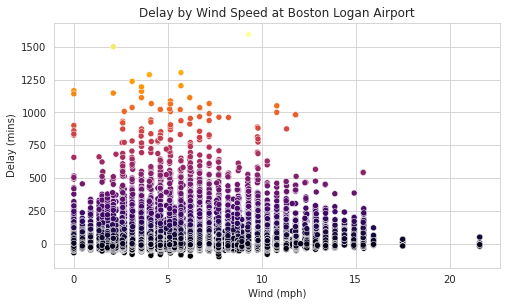

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Wind vs Delay
plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
plt.title("Delay by Wind Speed at Boston Logan Airport")
wind = sns.scatterplot(data=df, x='wind', y='delay', hue='delay', palette='inferno', legend=False)
wind.set_xlabel("Wind (mph)")
wind.set_ylabel("Delay (mins)")

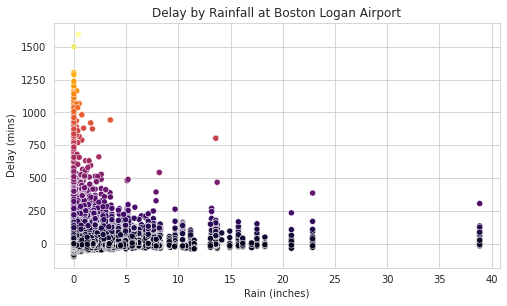

In [12]:
# Rain vs Delay
plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
plt.title("Delay by Rainfall at Boston Logan Airport")
wind = sns.scatterplot(data=df, x='rain', y='delay', hue='delay', palette='inferno', legend=False)
wind.set_xlabel("Rain (inches)")
wind.set_ylabel("Delay (mins)")

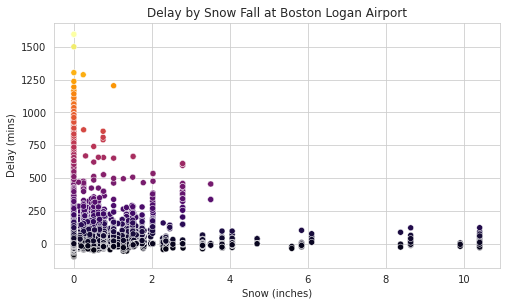

In [13]:
# Snow vs Delay
plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
plt.title("Delay by Snow Fall at Boston Logan Airport")
wind = sns.scatterplot(data=df, x='snow', y='delay', hue='delay', palette='inferno', legend=False)
wind.set_xlabel("Snow (inches)")
wind.set_ylabel("Delay (mins)")

In [14]:

import plotly.express as px

new_df_vis = pd.DataFrame(df[["delay", "origin"]].groupby(by = "origin").mean())
new_df_vis = new_df_vis.sort_values(by = "delay", ascending = False)

fig = px.bar(new_df_vis, x= new_df_vis.index, y = "delay", color = "delay", log_y = False
            ,title = "Average Delay for Different Departure airports", width = 1400, height = 700)
fig.show()

Unsupported

#### 3.2.2 Embedded visualizations
A visualization detailing the relationship between wind (mph) at scheduled time of arrival and consequent flight delay (min). There does not seem to be a clear correlation between wind and delay.

<a href="https://ibb.co/Nmb24pj"><img src="https://i.ibb.co/D8TfqkC/Screen-Shot-2021-12-10-at-22-29-13.png" alt="Screen-Shot-2021-12-10-at-22-29-13" border="0"></a>

A visualization detailing the relationship between rain (inches) at scheduled time of arrival and consequent flight delay (min). There does not seem to be a clear correlation between rain and delay.

<a href="https://ibb.co/dBRW0W2"><img src="https://i.ibb.co/LS3kzkt/Screen-Shot-2021-12-10-at-22-29-26.png" alt="Screen-Shot-2021-12-10-at-22-29-26" border="0"></a>

A visualization detailing the relationship between snow (inches) at scheduled time of arrival and consequent flight delay (min). There does not seem to be a clear correlation between snow and delay.

<a href="https://ibb.co/vBw0Nzn"><img src="https://i.ibb.co/9v8QxY5/Screen-Shot-2021-12-10-at-22-29-33.png" alt="Screen-Shot-2021-12-10-at-22-29-33" border="0"></a>

A visualization displaying the average flight delay of various departure airports.

<a href="https://ibb.co/S32gbgf"><img src="https://i.ibb.co/tJS6g6L/vis-four.png" alt="vis-four" border="0"></a>

### 3.3. Model Training

In this section, we perform data preprocessing to prepare the data for model training and then train our chosen models (Linear, Ridge, and Lasso regression) on our training data. We also perform feature selection in order to see whether we can obtain comparable performance using fewer feature variables. Ultimately, we find no significant difference in model fit between the training and testing datasets, and that feature selection decreased the predictive accuracy of our models.

#### 3.3.1 Data preprocessing

In [15]:
# The dataset, for reference
df.head()

,carrier,date,origin,sat,aat,set,aet,delay,wot,taxi,wind,rain,snow,clouds,weather
0,AA,01/01/2019,ORD,16:24,16:16,129.0,110.0,-8.0,16:11,5.0,9.77,0.25,0.0,40,light rain
1,AA,01/01/2019,LAX,16:49,16:38,329.0,302.0,-11.0,16:32,6.0,9.77,0.25,0.0,40,light rain
2,AA,01/01/2019,CLT,16:13,16:29,123.0,113.0,16.0,16:20,9.0,9.77,0.25,0.0,40,light rain
3,AA,01/01/2019,PHL,16:38,16:44,78.0,75.0,6.0,16:39,5.0,9.77,0.25,0.0,40,light rain
4,AA,01/01/2019,MIA,16:45,16:24,190.0,172.0,-21.0,16:18,6.0,9.77,0.25,0.0,40,light rain


In [16]:
# Preprocess all numerical data by min-max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ["set", "aet", "taxi", "wind", "wind", "rain", "snow", "clouds"]

df_scaled = df
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df_scaled

,carrier,date,origin,sat,aat,set,aet,delay,wot,taxi,wind,rain,snow,clouds,weather
0,AA,01/01/2019,ORD,16:24,16:16,0.269841,0.210728,-8.0,16:11,0.028090,0.452315,0.006433,0.0,0.40,light rain
1,AA,01/01/2019,LAX,16:49,16:38,0.904762,0.578544,-11.0,16:32,0.033708,0.452315,0.006433,0.0,0.40,light rain
2,AA,01/01/2019,CLT,16:13,16:29,0.250794,0.216475,16.0,16:20,0.050562,0.452315,0.006433,0.0,0.40,light rain
3,AA,01/01/2019,PHL,16:38,16:44,0.107937,0.143678,6.0,16:39,0.028090,0.452315,0.006433,0.0,0.40,light rain
4,AA,01/01/2019,MIA,16:45,16:24,0.463492,0.329502,-21.0,16:18,0.033708,0.452315,0.006433,0.0,0.40,light rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130479,WN,12/09/2019,BNA,01:15,01:55,0.288889,0.235632,40.0,01:49,0.033708,0.263889,0.000000,0.0,0.90,overcast clouds
130480,WN,12/11/2019,BNA,01:15,01:04,0.288889,0.231801,-11.0,01:00,0.022472,0.165741,0.006691,0.0,1.00,light rain
130481,WN,12/12/2019,BNA,01:15,01:07,0.288889,0.235632,-8.0,01:02,0.028090,0.236111,0.000000,0.0,0.20,few clouds
130482,WN,12/13/2019,BNA,01:15,01:16,0.288889,0.252874,1.0,01:11,0.028090,0.143519,0.000000,0.0,0.90,overcast clouds


In [17]:
# One-hot encode all categorical features
from sklearn.preprocessing import OneHotEncoder

# Get carrier array, initialize a OneHotEncoder object, and create a Dataframe object from it
carrier_data = df_scaled["carrier"].values.reshape(-1, 1)
encoder_carrier = OneHotEncoder(sparse = False)
encoded_df_carrier = encoder_carrier.fit_transform(carrier_data)

# Create one-hot encoded carrier DataFrame and insert values into it
encoder_carrier.get_feature_names_out(["carrier"])
features_carrier = pd.DataFrame(encoded_df_carrier, columns = encoder_carrier.get_feature_names_out(["carrier"]))

# # Get origin array, initialize a OneHotEncoder object, and create a Dataframe object from it
origin_data = df_scaled["origin"].values.reshape(-1, 1)
encoder_origin = OneHotEncoder(sparse = False)
encoded_df_origin = encoder_origin.fit_transform(origin_data)

# Create one-hot encoded origin DataFrame and insert values into it
encoder_origin.get_feature_names_out(["origin"])
features_origin = pd.DataFrame(encoded_df_origin, columns = encoder_origin.get_feature_names_out(["origin"]))

# Get weather array, initialize a OneHotEncoder object, and create a Dataframe object from it
weather_data = df_scaled['weather'].values.reshape(-1, 1)
encoder_weather = OneHotEncoder(sparse = False)
encoded_df_weather = encoder_weather.fit_transform(weather_data)

# Create one-hot encoded weather DataFrame and insert values into it
encoder_weather.get_feature_names_out(["weather"])
features_weather = pd.DataFrame(encoded_df_weather, columns = encoder_weather.get_feature_names_out(['weather']))

In [18]:
# Update DataFrame to use one-hot encoded columns
for carrier in features_carrier.columns:
    df_scaled[carrier] = features_carrier[carrier]

for origin in features_origin.columns:
   df_scaled[origin] = features_origin[origin]
    
    
for weather in features_weather.columns:
    df_scaled[weather] = features_weather[weather]

In [19]:
# Drop encoded columns
encoded_scaled_df = df_scaled.drop(["origin", "weather", "carrier", "date", "sat", "aat", "wot"], axis = 1)

#### 3.3.2 Model training

In [20]:
from sklearn.model_selection import train_test_split

# Get features matrix and target vector
features = encoded_scaled_df.drop("delay", axis = 1)
target = encoded_scaled_df["delay"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Store regression models in a dictionary
model_dict = {"Linear Regression" : LinearRegression(), "Ridge Regression" : Ridge(), "Lasso Regression" : Lasso()}

# Fit models and store in a dictionary
fitted_models = {name : model.fit(X=X_train, y=y_train) for name, model in model_dict.items()}

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# We define a reusable function to evaluate performance of a given model using r2_score and mean_squared_error
def evaluate_performance(X_train, X_test, y_train, y_test, model):
    """
    Compare R-squared and MSE performance scores of a model using training and test data.

    Arguments
        X_train: training data set
        X_test:  testing data set
        y_train: training target vector
        y_test:  testing target vector
        model:   regression model to evaluate

    Returns: None; prints a summary of the results
    """
    print("Training set R^2:\t", r2_score(y_train, model.predict(X_train)),
          "\tMSE:\t", mean_squared_error(y_train, model.predict(X_train)))
    print("Testing set R^2:\t", r2_score(y_test, model.predict(X_test)),
          "\tMSE:\t", mean_squared_error(y_train, model.predict(X_train)), "\n")

In [23]:
# We define a reusable function for evaluating the performance of several models side-by-side using r2_score and mean_squared_error
def evaluate_models(X_train, X_test, y_train, y_test, models):
    """
    Evaluate the R-squared and MSE performance scores for a dictionary of fitted models.

    Arguments
        X_train: training data set
        X_test:  testing data set
        y_train: training target vector
        y_test:  testing target vector
        models: Model name-model object dictionary in the format {String : Model()}

    Returns: None; prints a summary of the results
    """
    for name, model in models.items():
        print(name + ":")
        evaluate_performance(X_train, X_test, y_train, y_test, model)

In [24]:
# Evaluate the models
evaluate_models(X_train, X_test, y_train, y_test, fitted_models)

Linear Regression:
Training set R^2:	 0.10527927778272916 	MSE:	 3528.267437806446
Testing set R^2:	 0.10647577280723819 	MSE:	 3528.267437806446 

Ridge Regression:
Training set R^2:	 0.10527308216137776 	MSE:	 3528.291869797936
Testing set R^2:	 0.10654416619168638 	MSE:	 3528.291869797936 

Lasso Regression:
Training set R^2:	 0.02147422468656035 	MSE:	 3858.746695322792
Testing set R^2:	 0.022713003343673654 	MSE:	 3858.746695322792 



#### 3.3.3 Feature selection

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

# Initialize a SelectFromModel object
select = SelectFromModel(DecisionTreeRegressor(random_state = 3000), threshold = "median")

# Fit the feature selection object to the training data
select.fit(X_train, y_train)

# Transform X_train and X_test using the model
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [26]:
# We use the model dictionary from before
model_dict

{'Linear Regression': LinearRegression(),
 'Ridge Regression': Ridge(),
 'Lasso Regression': Lasso()}

In [27]:
# Recall model performance before feature selection
print("Model performance before feature selection:\n")
evaluate_models(X_train, X_test, y_train, y_test, fitted_models)

# Fit models to the new feature-selected dataset and store in a dictionary
fitted_selected_models = {name : model.fit(X=X_train_selected, y=y_train) for name, model in model_dict.items()}

# Evaluate model performance after feature selection
print("Model performance after feature selection:\n")
evaluate_models(X_train_selected, X_test_selected, y_train, y_test, fitted_selected_models)

Model performance before feature selection:

Linear Regression:
Training set R^2:	 0.10527927778272916 	MSE:	 3528.267437806446
Testing set R^2:	 0.10647577280723819 	MSE:	 3528.267437806446 

Ridge Regression:
Training set R^2:	 0.10527308216137776 	MSE:	 3528.291869797936
Testing set R^2:	 0.10654416619168638 	MSE:	 3528.291869797936 

Lasso Regression:
Training set R^2:	 0.02147422468656035 	MSE:	 3858.746695322792
Testing set R^2:	 0.022713003343673654 	MSE:	 3858.746695322792 

Model performance after feature selection:

Linear Regression:
Training set R^2:	 0.09839913792844912 	MSE:	 3555.398779254818
Testing set R^2:	 0.10082731043679949 	MSE:	 3555.398779254818 

Ridge Regression:
Training set R^2:	 0.09839745941374556 	MSE:	 3555.4053983579925
Testing set R^2:	 0.1008669738040876 	MSE:	 3555.4053983579925 

Lasso Regression:
Training set R^2:	 0.02147422468656035 	MSE:	 3858.746695322792
Testing set R^2:	 0.022713003343673654 	MSE:	 3858.746695322792 



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, but Ridge was fitted with feature names

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning:

X does not have valid feature names, b

### 3.4. Model Optimization

We would like to perform hyperparameter tuning on our Ridge and Lasso algorithms, in order to see whether it is possible to improve predictive accuracy. We do so by using the GridSearch algorithm to identify the best parameters to use.

In [28]:
from sklearn.model_selection import GridSearchCV

# Get features matrix and target vector, and split data into training and test sets
features_grid = encoded_scaled_df.drop("delay", axis = 1)
target_grid = encoded_scaled_df["delay"]
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(features_grid, target_grid, random_state = 3000)

# Set a range of alpha values to try
param_grid = {"alpha":[0.01, 0.1, 1, 10, 100]}

In [29]:
# Use GridSearch to identify the best parameters for the Ridge regression model
grid_search = GridSearchCV(Ridge(), param_grid, cv = 5)

grid_search.fit(X=X_train_grid, y = y_train_grid)

print("Best estimator: ", grid_search.best_estimator_)
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best estimator:  Ridge(alpha=1)
Best parameters:  {'alpha': 1}
Best cross-validation score:  0.10284167592225033


In [30]:
# Use GridSearch to identify the best parameters for the Lasso regression model
grid_search = GridSearchCV(Lasso(), param_grid, cv = 5)

grid_search.fit(X=X_train_grid, y = y_train_grid)

#Prints the attributes tied to the grid search
print("Best estimator: ", grid_search.best_estimator_)
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best estimator:  Lasso(alpha=0.01)
Best parameters:  {'alpha': 0.01}
Best cross-validation score:  0.10239878762012582


### 3.5. Model Testing
Now, we test the optimized models with the identified parameters using our testing dataset.

In [31]:
# Store the optimal models in a dictionary
optimized_model_dict = {"Linear Regression" : LinearRegression(),
                        "Ridge Regression" : Ridge(alpha=1),
                        "Lasso Regression" : Lasso(alpha=0.01)}

# Feature selection resulted in worse performance, so we fit the models to the original datasets
fitted_optimized_models = {name : model.fit(X=X_train, y=y_train) for name, model in optimized_model_dict.items()}

# Evaluate the models
evaluate_models(X_train, X_test, y_train, y_test, fitted_optimized_models)

Linear Regression:
Training set R^2:	 0.10527927778272916 	MSE:	 3528.267437806446
Testing set R^2:	 0.10647577280723819 	MSE:	 3528.267437806446 

Ridge Regression:
Training set R^2:	 0.10527308216137776 	MSE:	 3528.291869797936
Testing set R^2:	 0.10654416619168638 	MSE:	 3528.291869797936 

Lasso Regression:
Training set R^2:	 0.10424701964333294 	MSE:	 3532.338074252215
Testing set R^2:	 0.1066487357938839 	MSE:	 3532.338074252215 



<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

### Findings

In this analysis, we compared Ridge, Lasso, and Linear Regression algorithms. We found Linear Regression to most accurately predict flight delays, and using hyperparameter tuning, found that this algorithm would work best with default parameters. We note that all of the algorithms performed similarly, and that the performance of the Lasso Regression algorithm was significantly improved by the optimization tasks we carried out. Ultimately, we recommend using Linear Regression for predicting flight delays based on the features described previously. From testing the model, we find no significant difference in model fit between the training and testing datasets.

Although Linear Regression performed the best of all algorithms tested, all of the algorithms we compared had very similar R-squared scores close to 0.1 after tuning. This means that for the most part, the features we analyzed have little to no impact on flight delays, according to our models. Therefore, we conclude that the features we selected were not particularly useful in predicting flight delays using the algorithms we applied. This is perhaps a good thing for American domestic commercial aviation, as it indicates that flights are mostly consistent across variables like where the flight originated from, which carrier operated the flight, and meteorological conditions at the destination.

### Ethics and Methodological Bias

As researchers, it is our responsibility to ensure that the methods employed by this project and any impacts it may have meet certain ethical criteria. We evaluate this project using criteria enumerated by the 1979 Belmont Report published by the US Department of Health and Human Services. These criteria are:
* Respect for persons: Any individual decision to participate in research studies should be informed and consensual.
* Beneficence: Every effort should be made to protect the personal well-being and reduce harm to individuals.
* Justice: Avoid facilitation of injustice, the denial of entitled benefit or imposition of undue burden.

The datasets used in this analysis describe domestic flight on-time performance and meteorological conditions. Flight data was sourced from the US Department of Transportation Bureau of Statistics, which aggregates data reported by carriers in the interest of commercial aviation passengers. Weather data was sourced from OpenWeatherMap, which maintains open source repositories for public benefit. We do not believe that there are any major sources of bias reflected by these datasets.

We neither collected nor processed any form of individual personal data, and thus conclude that this project honors the principles of respect for persons and beneficence. As for justice, we acknowledge that restricting our flight data to the top five carriers by market share at Logan Airport may disadvantage smaller carriers, but note that the large volume of data that would need to be analyzed to facilitate inclusion of all carriers operating at Logan would be computationally prohibitive.

Therefore, though our model may have issues with predictive accuracy, we see no reason why our results should be discounted purely from an ethical or methodological standpoint.

### Future Work

#### Cancelled Flights
A significant shortcoming of our dataset is that it contains no reference to flights that have been cancelled. This is an important limitation, because we suspect that flights that would be delayed by weather, airport, or carrier issues beyond a certain threshold would simply be cancelled, and thus not appear in our dataset. In future analysis, we might like to explore how cancelled flights factor into the interplay between our selected features and whether a flight is able to arrive to its destination within a reasonable time frame.

#### Limitations of Meteorological Data
Another shortcoming of our dataset is that it takes into account only meteorological conditions at Logan Airport. This was due to limited accessibility, and the sheer volume of data that would need to be handled if we were to analyze conditions at the originating airport, as well as en route. Much of the delay that is caused by adverse weather conditions is caused by a need to detour around a weather system, adding more distance to cover, and thus increasing the duration of the flight. Weather conditions at the destination mostly only affect taxi time to the gate after landing or runway traffic, which is likely to be less impactful than a detour in the air.

#### Other Features
Another avenue for further work might include finding different features to predict on. Our weather dataset contains a variety of meteorological conditions, at varying levels of specificity. For example, although we only made use of rain and snow in the hour in which flights arrived, the dataset has data on the amount of precipitation in the past three hours. Perhaps whether or not precipitation is sustained is also important, alongside the amount of it. As above, we also note that our flight data was limited to the five largest carriers at Logan by market share, which have significant experience managing flight delays, and generally employ larger, more robust planes which are less affected by adverse weather conditions. In light of this, we may want to explore whether our features might affect on-time performance of smaller carriers.

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS

#### Ryan
* Introductory writing and delineation of project parameters
* Sourcing data and acquisition
* Data exploration and visualization
* Model training and testing
* Model optimization

#### George
* Introductory writing and delineation of project parameters
* Data wrangling
* Data preprocessing (scaling and encoding)
* Data exploration and visualization
* Model training and testing

#### Tim
* Introductory writing and delineation of project parameters
* Sourcing data and acquisition
* Data wrangling
* Data preprocessing (scaling and encoding)
* Model training testing, optimization
* Discussion of findings, evaluation of ethical and methodological issues, and future work